<a href="https://colab.research.google.com/github/thepavankapoor/shartankindia/blob/main/sti_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import seaborn as sea

In [2]:
shark = pd.read_csv('/content/Shark Tank India.csv')

In [3]:
# Replacing empty spaces in the column names with underscores
shark.columns = shark.columns.str.replace(' ', '_')

Calculating the total amount each Shark invested and displaying the dat using a bar chart

In [4]:
ash_total = shark.Ashneer_Investment_Amount.sum()
nam_total = shark.Namita_Investment_Amount.sum()
anu_total = shark.Anupam_Investment_Amount.sum()
vin_total = shark.Vineeta_Investment_Amount.sum()
pey_total = shark.Peyush_Investment_Amount.sum()
ghaz_total = shark.Ghazal_Investment_Amount.sum()
aman_total = shark.Aman_Investment_Amount.sum()

total_investment_amount = [ash_total, aman_total, nam_total, anu_total, vin_total, pey_total, ghaz_total]
names = ['Ashneer', 'Aman', 'Namita', 'Anupam', 'Vineeta', 'Peyush', 'Ghazal']

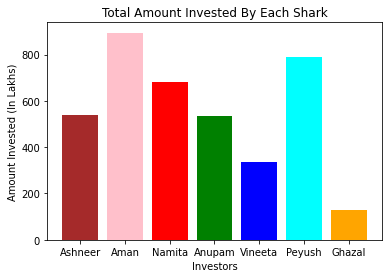

In [5]:
my_colors = ['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple']
plt.bar(names, total_investment_amount, color=my_colors)
plt.title('Total Amount Invested By Each Shark')
plt.xlabel('Investors')
plt.ylabel('Amount Invested (In Lakhs)')
plt.show()

Grouping the data based on the industry each participating startup belonged to and using a pie chart to display the breakdown of total investments made in each industry.

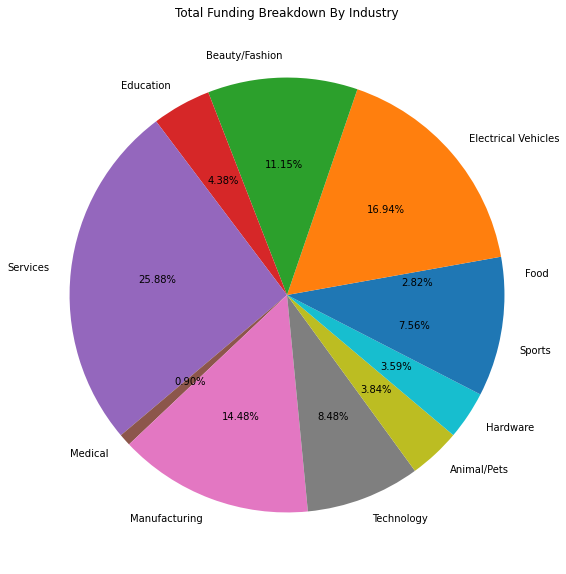

In [6]:
category = shark.Industry.unique()
indus = shark.groupby('Industry').Total_Deal_Amount.sum()
f, ax = plt.subplots(figsize=(12, 10))
plt.pie(indus, labels=category, autopct='%.2f%%')
plt.title('Total Funding Breakdown By Industry', loc='center')
plt.show()

Age-wise successful deal breakdown

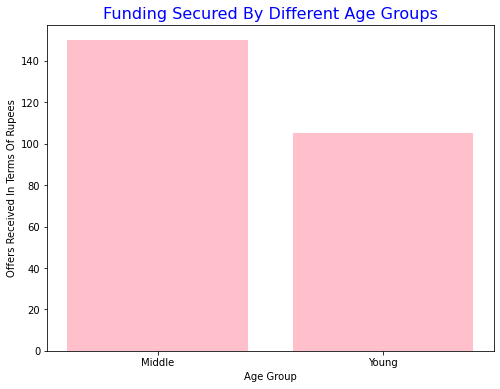

In [9]:
colorz = ['pink']
avg_age = shark.Pitchers_Average_Age
tot = shark.Total_Deal_Amount
f, ax = plt.subplots(figsize=(8, 6))
plt.bar(avg_age, tot, color=colorz)
plt.title('Funding Secured By Different Age Groups', fontdict={'fontsize': 16, 'color': 'blue'})
plt.xlabel('Age Group')
plt.ylabel('Offers Received In Terms Of Rupees')
plt.grid(visible=False)
plt.show()

Valuation requested by the startups v/s the valuation the Sharks 

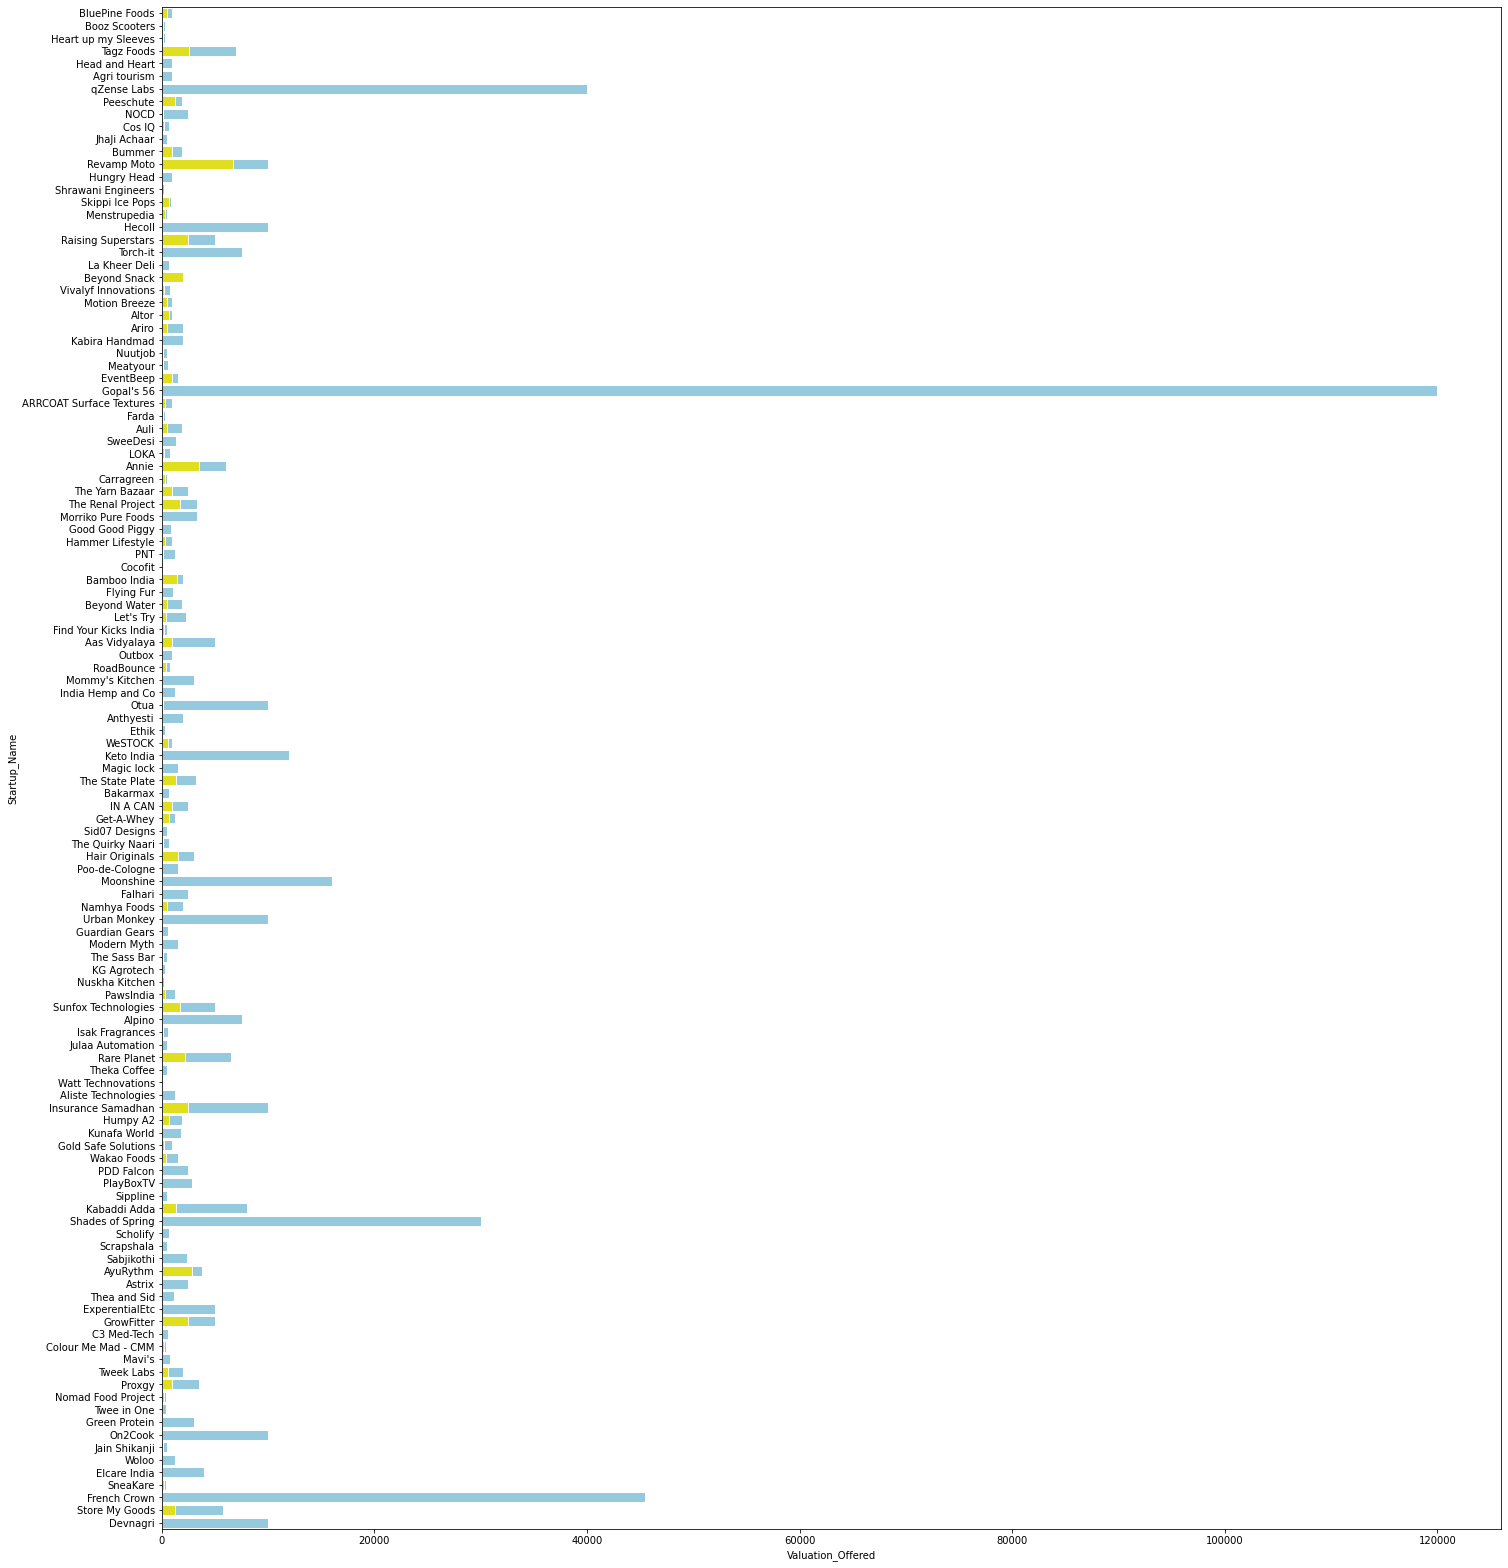

In [10]:
f, ax = plt.subplots(figsize=(24, 28))
sea.set_theme(style="whitegrid")
val_req = shark.Valuation_Requested
val_off = shark.Valuation_Offered
sea.set_color_codes("pastel")
sea.barplot(x="Valuation_Requested", y="Startup_Name", data=shark, label="Valuation Offered v/s Valuation Requested", color = "skyblue")
sea.barplot(x="Valuation_Offered", y="Startup_Name", data=shark, label="Valuations Offered", color="yellow")
sea.set_color_codes("muted")

In [11]:
#Replacing all null values with '0'
shark.Male_Presenters.fillna(0, inplace = True)
shark.Female_Presenters.fillna(0, inplace = True)
shark.Couple_Presenters.fillna(0, inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

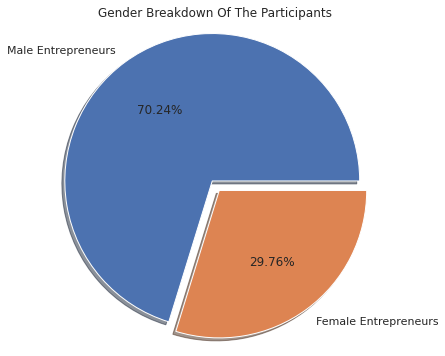

In [12]:
#Gender Breakdown Of Successful Deals
pie_genders = [shark.Male_Presenters.sum(), shark.Female_Presenters.sum()]
gender_labels = ['Male Entrepreneurs', 'Female Entrepreneurs']
explode_gen = (0, 0.08)
fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.title('Gender Breakdown Of The Participants')
ax1.pie(pie_genders, explode=explode_gen, labels=gender_labels, autopct='%.2f%%', shadow=True)
ax1.axis('equal')
plt.show

Number of offers received per Industry

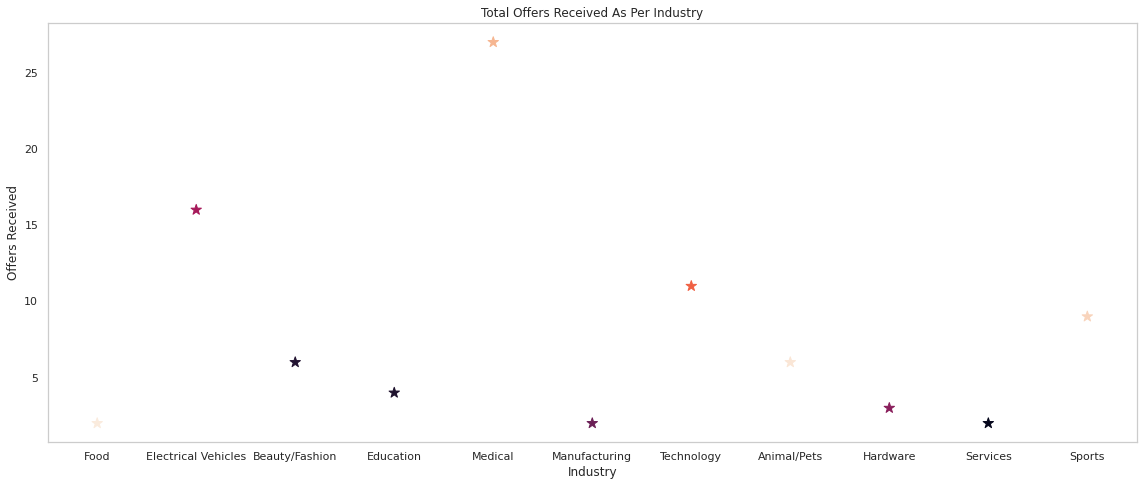

In [13]:
received_offer_true = shark[shark["Received_Offer"]==1]
new_industry = received_offer_true.groupby('Industry').Received_Offer.sum()
category_s = received_offer_true.Industry.unique()
N = 11
category_color = np.random.rand(N)
fig, ax = plt.subplots()
ax.scatter(category_s, new_industry, c=category_color, marker='*', s=120.0)
ax.set_xlabel('Industry')
ax.set_ylabel('Offers Received')
ax.set_title('Total Offers Received As Per Industry')
ax.grid(False)
fig.tight_layout()
fig.set_size_inches(18, 8)
plt.show()

Equity Asked By Entrepreneurs v/s Equity Offered By Sharks

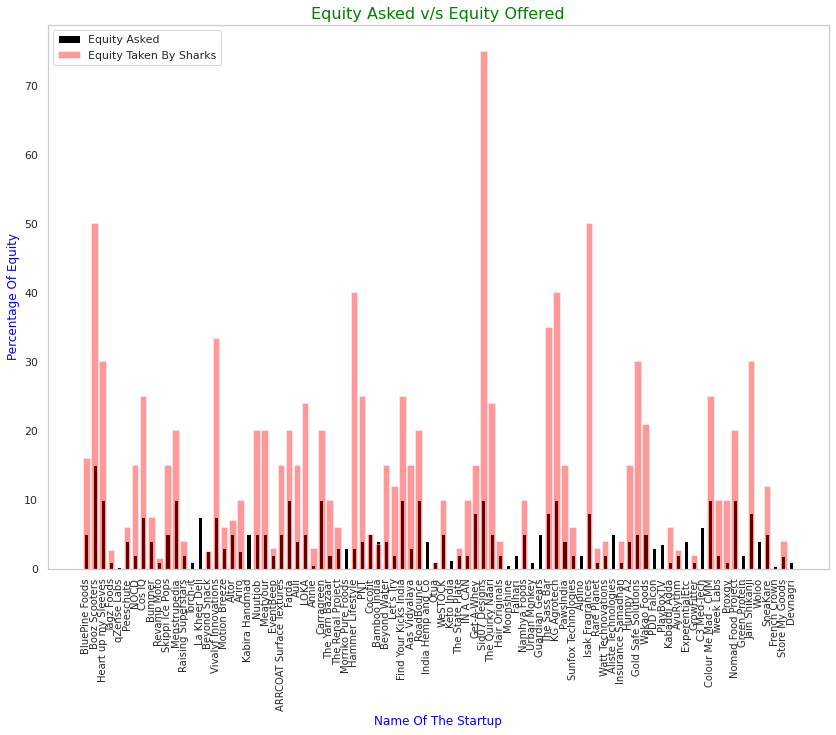

In [14]:
eq_off = received_offer_true.Original_Ask_Equity
eq_rec = received_offer_true.Total_Deal_Equity
co_name = received_offer_true.Startup_Name
fig, ax = plt.subplots()
width = 0.5
width_1 = 0.8
eq_bar = np.arange(len(eq_rec))
x_eq_off = [1 - width]
x_eq_rec = [1 + width]
ax.bar(eq_bar, eq_off, width=width, label='Equity Asked', color='black', alpha=1)
ax.bar(eq_bar, eq_rec, width=width_1, label='Equity Taken By Sharks', color='red', alpha=0.4, tick_label=co_name)
ax.tick_params(axis='x', labelsize='small', rotation=90)
ax.set_title('Equity Asked v/s Equity Offered', fontdict={'color':'green','fontsize':'16'})
ax.grid(False)
plt.xlabel('Name Of The Startup', fontdict={'fontsize':12,'color':'blue'})
plt.ylabel('Percentage Of Equity', fontdict={'fontsize':12,'color':'blue'})
plt.legend()
# ax.bar(co_name, height=1, font)
fig.set_size_inches(14, 10)
plt.show()